In [79]:
!pip install qiskit

from IPython.display import clear_output
clear_output()

In [80]:
import numpy as np
import math

In [81]:
from qiskit import QuantumRegister, ClassicalRegister, BasicAer
from qiskit import QuantumCircuit
from qiskit import Aer, execute

from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector

### Initializing the state to be teleported

First, we need to initialize the qubit to be teleported.

In [82]:
def initialize_qubit(given_circuit, qubit_index, vector):    
    
    given_circuit.initialize(
        vector,
        [given_circuit.qregs[0][qubit_index]]
    )
    
    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

This is achieved with a Hadamard and a CNOT gate.

### Entanglement between Alice and Bob qubits

In [83]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    given_circuit.h(qubit_Alice) # Put qubit_Alice into state |+>
    given_circuit.cx(qubit_Alice,qubit_Bob) # CNOT with a as control and qubit_Bob as target
    
    return given_circuit

### Bell measurement on Alice qubit

In [84]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    given_circuit.cx(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)
    
    return given_circuit

### Controlled operations based on measurements

In [85]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
   
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1) # Apply gates if the registers 
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1) # are in the state '1'
    
    return given_circuit

### Complete the entire circuit

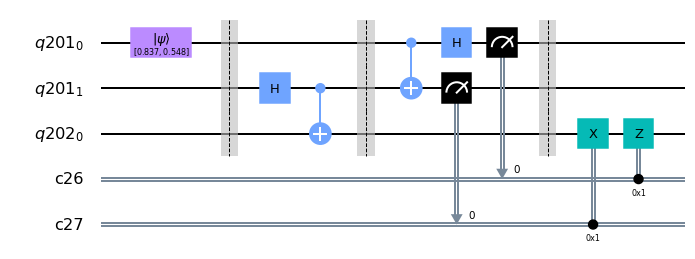

In [86]:
probabilities = [0.7, 0.3]
initial_state = np.sqrt(probabilities)


### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0, vector)
mycircuit.barrier()

# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()

# Bell Measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()

# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

mycircuit.draw('mpl')

### Simulating with state vector

##### Before teleportation

In [87]:
### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0, vector)
mycircuit.barrier()

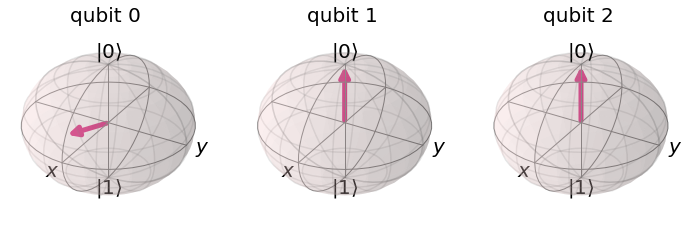

In [88]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(mycircuit, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

##### After teleportation

In [89]:
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()

# Bell Measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()

# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

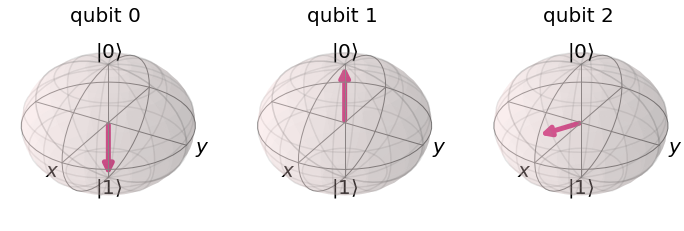

In [90]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(mycircuit, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

### Simulating with qasm simulator

In [78]:
inverse_init_gate = init_gate.gates_to_uncompute()

NameError: name 'init_gate' is not defined

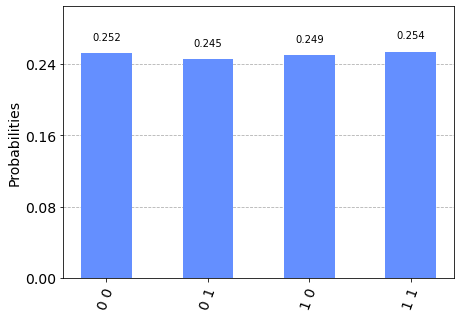

In [77]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

In [7]:
vec = np.sqrt([0.7, 0.3])

In [ ]:
vec = np.sqrt(np.array([0.7, 0.3]))

In [ ]:
vec